<a href="https://colab.research.google.com/github/annasvenbro/etudesnordiques/blob/main/Test_plein_texte_notices_HAL_etudes_nordiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tester la différence entre le nombre de notices et le nombre d'articles en plein texte déposés dans HAL dans la collection "Études nordiques"

La **Loi pour une République Numérique**, dans son article 30, permet le **dépôt en *open access*** des écrits scientifiques publiés dans une revue paraissant au moins une fois l'an, dans la version qui a été acceptée par l'éditeur.
Cette loi fixe un **délai d'embargo maximal** que les éditeurs peuvent imposer aux publiants qui veulent déposer leurs publications en *open access* dans une archive ouverte. Celui-ci est de **6 mois** pour les publications en sciences, techniques et médecine (**STM**) et de **1 an** pour les sciences humanes et sociales (SHS).

L'objectif de ce notebook est d'interroger l'API de HAL pour déterminer quel est le nombre des articles, parmi la collection "Études nordiques", qui ont été déposés en plein texte, par rapport à ceux dont seule la notice a été déposée.

##Import des paquets nécessaires

In [ ]:
import requests as rq #La bibliothèque requests sert à envoyer des requêtes HTTP en utilisant Python.
import json #Importer JSON (est un format très simple d'échange de données inspiré par la syntaxe des objets littéraux de JavaScript)
import json.decoder #Module d'encodage et de décodage de JSON.
import pandas as pd #Pour manipuler les dataframes.

##Définition de la fonction pour requêter la collection HAL "Études nordiques"

In [ ]:
#http://api.archives-ouvertes.fr/search/ETUDES-NORDIQUES/?q=*:*&fq=docType_s:(ART OR ARTREV OR DATAPAPER OR BOOKREVIEW)&fq=publicationDateY_i:2022&fq=submitType_s:notice Exemple de requête de laquelle on va partir.

In [ ]:
def req_annee(annee,type_depot) :#On définit une fonction à 2 variables (annee,type_depot) pour avoir le nombre d'articles (au sens large du terme) pour telle année pour tel type de dépôt (notice ou document). ON ne veut pas leurs métadonnées.
    req = rq.get(f"https://api.archives-ouvertes.fr/search/ETUDES-NORDIQUES/?q=*:*&fq=docType_s:(ART)&fq=publicationDateY_i:{annee}&fq=submitType_s:{type_depot}&rows=0")
    req = req.json()
    nombre = req["response"]["numFound"]
    return nombre

In [ ]:
req_annee(2019,"file")#On va savoir grâce à cette fonction combien de fichiers plein-texte ("file") ont été déposés dans HAL dans la collection "Études nordiques" en 2019.

30

In [ ]:
req_annee(2019,"notice") #On va savoir la même chose pour les notices seules.

25

##Création d'un dictionnaire avec les résultats de requêtes plein texte / notices de 2010 à 2022

In [ ]:
donnees={}#On veut avoir ces données pour toutes les années depuis 2010. On va donc créer un dictionnaire qui va donner le résultat de la fonction depuis 2010. On l'initalise d'abord.
sous_types=["file","notice"] #Pour chaque clef du dictionnaire, on aura une liste avec le nombre de dépôts plein texte et le nombre de notices seules.
for annee in range(2010, 2023):#On fait une première boucle en for pour chaque clef/année comprise entre 2010 et 2023-1=2022.
    donnees[annee]={} #On crée la première clef de notre dictionnaire. On initialise ce qui se trouve sous chaque clef.
    for st in sous_types : #On fait une seconde boucle en for pour chaque élément (plein texte ou notice seule) compris dans la liste "sous_types".
        nombre=req_annee(annee,st)#On définit la variable "nombre" comme retour de la fonction précédente pour chaque année et pour chaque type.
        donnees[annee][st]=nombre #Notre dictionnaire sera défini par les retours successifs pour chaque sous-type par année.
donnees #La requête prend une minute environ...

{2010: {'file': 15, 'notice': 15},
 2011: {'file': 12, 'notice': 20},
 2012: {'file': 11, 'notice': 17},
 2013: {'file': 13, 'notice': 22},
 2014: {'file': 17, 'notice': 16},
 2015: {'file': 9, 'notice': 28},
 2016: {'file': 17, 'notice': 21},
 2017: {'file': 21, 'notice': 16},
 2018: {'file': 20, 'notice': 22},
 2019: {'file': 30, 'notice': 25},
 2020: {'file': 25, 'notice': 23},
 2021: {'file': 24, 'notice': 19},
 2022: {'file': 17, 'notice': 17}}

##Création du *dataframe* issu du dictionnaire

In [ ]:
df=pd.DataFrame.from_dict(donnees)#On transforme de dictionnaire en dataframe.
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
file,15,12,11,13,17,9,17,21,20,30,25,24,17
notice,15,20,17,22,16,28,21,16,22,25,23,19,17


In [ ]:
df=df.T #On transpose ce cataframe (on inverse les lignes et les colonnes)
df

,file,notice
2010,15,15
2011,12,20
2012,11,17
2013,13,22
2014,17,16
2015,9,28
2016,17,21
2017,21,16
2018,20,22
2019,30,25


In [ ]:
df.columns=["Fichiers plein texte","Notices seules"]#On renomme les colonnes
df

,Fichiers plein texte,Notices seules
2010,15,15
2011,12,20
2012,11,17
2013,13,22
2014,17,16
2015,9,28
2016,17,21
2017,21,16
2018,20,22
2019,30,25


##Représentation graphique

###Avec le module plotting de pandas

In [ ]:
from pandas import plotting #On importe la méthode pour faire un graphique avec Pandas.

<Axes: >

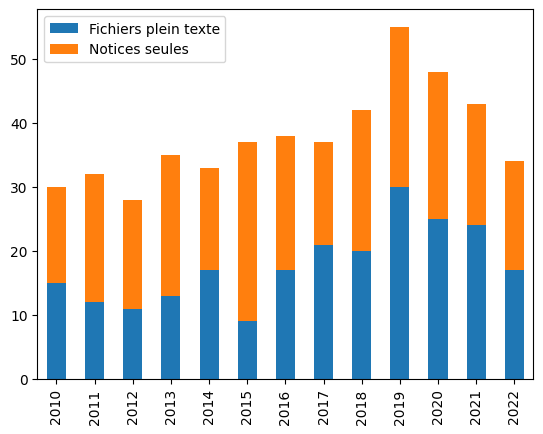

In [ ]:
df.plot(kind="bar",stacked="True")

###Avec le module pyplot de matplotlib

In [ ]:
import matplotlib.pyplot as plt #Idem avec Pyplot

<Figure size 640x480 with 0 Axes>

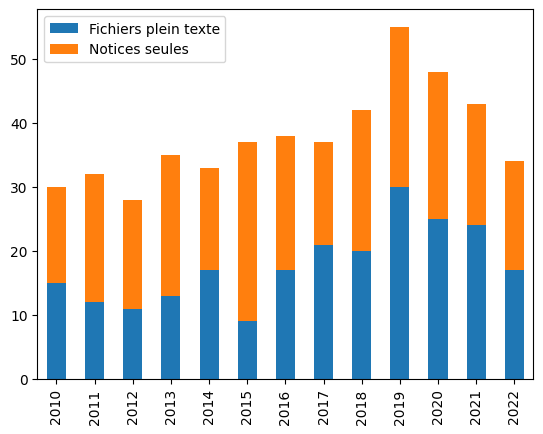

In [ ]:
plt.clf() #Effacer les représentations précédentes.
notices_plein_texte = df.plot.bar(stacked=True)#Le diagramme en barre donne le même rendu avec pyplot.